# **Importing Libiraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# **Load Dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

# **Feature Engineering**

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.transform(X_test)

# **Model**

In [ ]:
class LinearRegression:
    def __init__(self, lr=0.01, num_iters=1000):
        self.lr = lr
        self.num_iters = num_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0


        for _ in range(self.num_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [ ]:
model = LinearRegression(lr=0.01, num_iters=1000)
model.fit(X_train_scaler, y_train)

Train MSE: 22.309758894899296
Test MSE: 22.548340367986857
Train R2 Score: 0.736360612277322
Test R2 Score: 0.7291290495462426


In [ ]:
y_pred_train = model.predict(X_train_scaler)
y_pred_test = model.predict(X_test_scaler)

In [ ]:
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R2 Score:", r2_score(y_train, y_pred_train))
print("Test R2 Score:", r2_score(y_test, y_pred_test))

Train MSE: 22.309758894899296
Test MSE: 22.548340367986857
Train R2 Score: 0.736360612277322
Test R2 Score: 0.7291290495462426


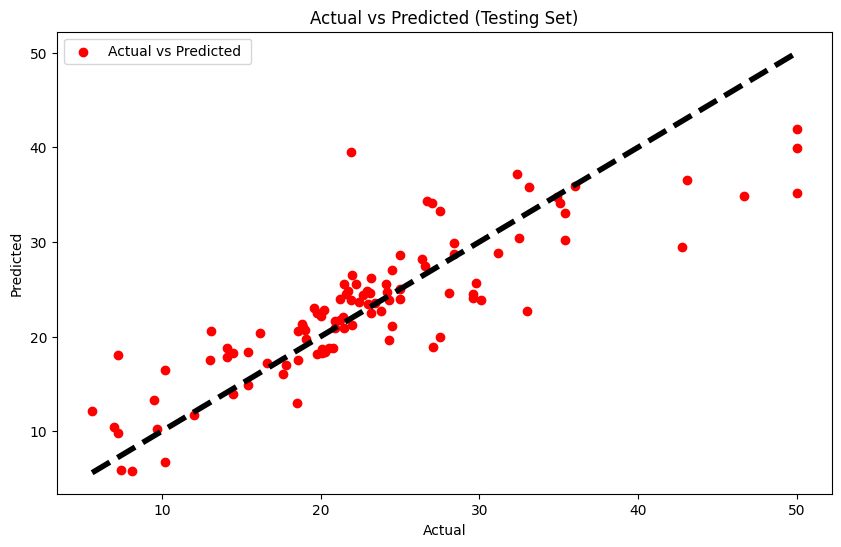

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='red', label='Actual vs Predicted ')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Testing Set)')
plt.legend()
plt.show()


In [ ]:
train_residuals = y_train - y_pred_train
test_residuals = y_test - y_pred_test

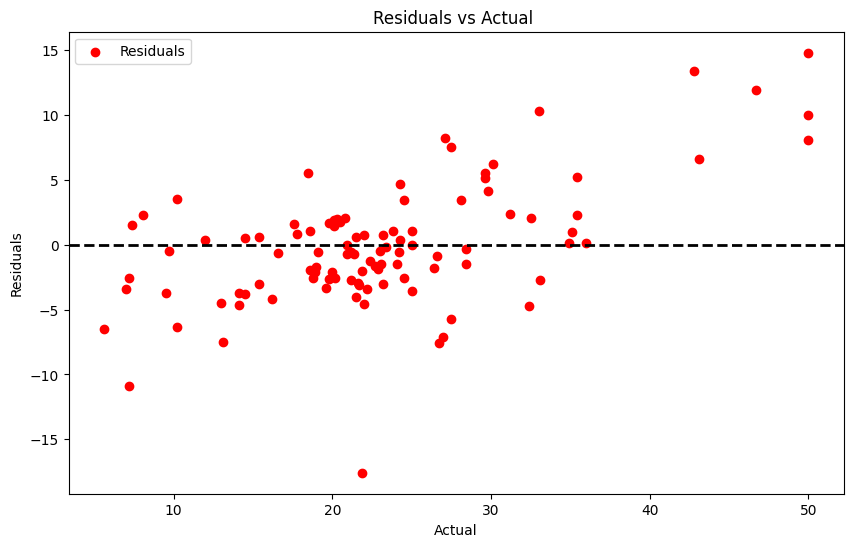

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_residuals, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual ')
plt.legend()
plt.show()


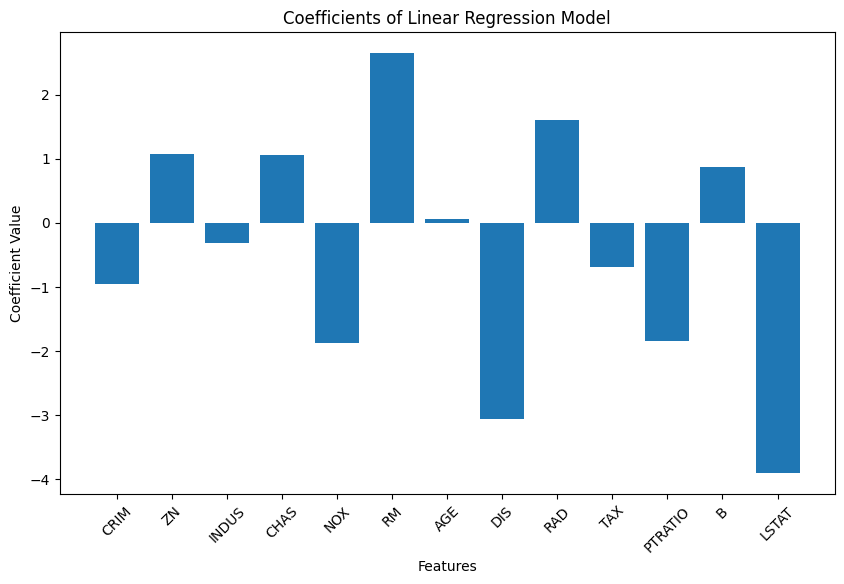

In [ ]:
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
plt.figure(figsize=(10, 6))
plt.bar(range(len(model.weights)), model.weights)
plt.xticks(range(len(model.weights)), feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Linear Regression Model')
plt.show()
